In [349]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snsd

In [350]:
from sklearn.datasets import load_iris
iris_dataset=load_iris()

In [351]:
df=pd.DataFrame(data=iris_dataset.data,columns=iris_dataset.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [352]:
df.drop(['sepal length (cm)','sepal width (cm)'],axis=1,inplace=True)
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


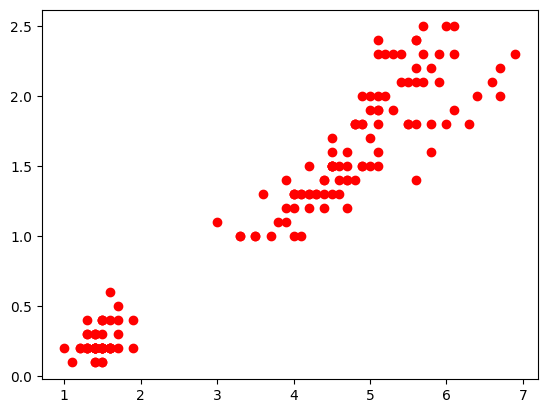

In [353]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'],color='r')

In [354]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3)

In [355]:
y_predicted=model.fit_predict(df[['petal length (cm)','petal width (cm)']])
df['cluster']=y_predicted
df

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,1
146,5.0,1.9,1
147,5.2,2.0,1
148,5.4,2.3,1


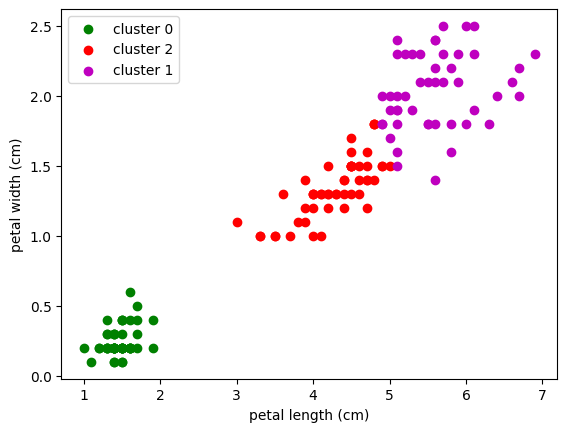

In [356]:
df1=df.loc[df['cluster']==0]
df2=df.loc[df['cluster']==2]
df3=df.loc[df['cluster']==1]

plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green',label='cluster 0')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red',label='cluster 2')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='m',label='cluster 1')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

The above clusters are not properly divided due to lack of feature scaling

In [357]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df['petal length (cm)']=scaler.fit_transform(df[['petal length (cm)']])
df['petal width (cm)']=scaler.fit_transform(df[['petal width (cm)']])
df


,petal length (cm),petal width (cm),cluster
0,-1.340227,-1.315444,0
1,-1.340227,-1.315444,0
2,-1.397064,-1.315444,0
3,-1.283389,-1.315444,0
4,-1.340227,-1.315444,0
...,...,...,...
145,0.819596,1.448832,1
146,0.705921,0.922303,1
147,0.819596,1.053935,1
148,0.933271,1.448832,1


Here we did feature scaling and then again model created using scaled features

In [358]:
model=KMeans(n_clusters=3)
df['cluster']=model.fit_predict(df[['petal length (cm)','petal width (cm)']])
df

,petal length (cm),petal width (cm),cluster
0,-1.340227,-1.315444,1
1,-1.340227,-1.315444,1
2,-1.397064,-1.315444,1
3,-1.283389,-1.315444,1
4,-1.340227,-1.315444,1
...,...,...,...
145,0.819596,1.448832,2
146,0.705921,0.922303,2
147,0.819596,1.053935,2
148,0.933271,1.448832,2


In [359]:
model.cluster_centers_

array([[ 0.3058728 ,  0.16541778],
       [-1.30498732, -1.25489349],
       [ 1.02799959,  1.12797813]])

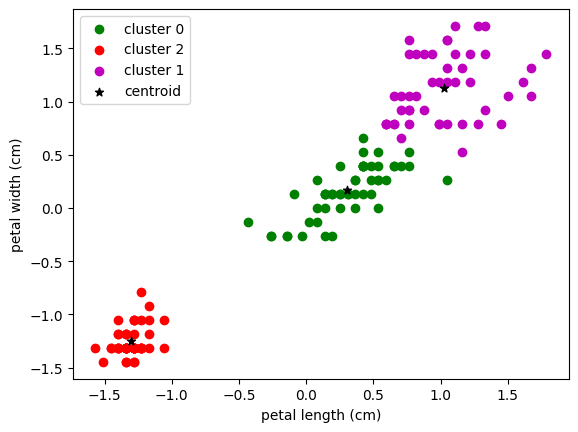

In [360]:
df1=df.loc[df['cluster']==0]
df2=df.loc[df['cluster']==1]
df3=df.loc[df['cluster']==2]



plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green',label='cluster 0')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red',label='cluster 2')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='m',label='cluster 1')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='k',marker="*",label='centroid')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

Elbow method
-------------

In [362]:
sse=[]
krange=range(1,10)
for k in krange:
    model=KMeans(n_clusters=k)
    model.fit_predict(df[['petal length (cm)','petal width (cm)']])
    sse.append(model.inertia_)
sse

[300.0,
 54.16878133149558,
 18.026962612544075,
 12.531779788079746,
 9.207544649686675,
 8.494658399034794,
 6.268116926438347,
 5.762234654865489,
 5.029591242855313]

Text(0.5, 0, 'K value')

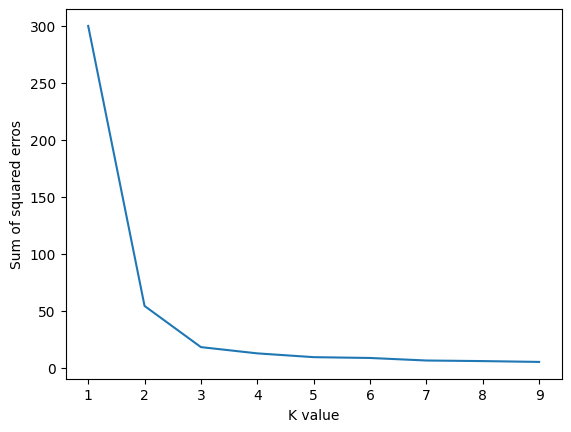

In [364]:
plt.plot(krange,sse)
plt.ylabel('Sum of squared erros')
plt.xlabel('K value')

🔍 What your graph shows:

K = 1 → 300

K = 2 → ~55 (very big drop)

K = 3 → ~20 (another clear drop)

K = 4 → ~13 (small improvement)

K = 5, 6, 7, 8, 9 → only tiny improvements

🎯 Best K = 3

Because:

From 1 → 2: massive drop (expected)

From 2 → 3: significant drop (important)

After K = 3, the line becomes almost flat → no major gain

The elbow occurs at K = 3, so K = 3 is the optimal number of clusters.